<a href="https://colab.research.google.com/github/galloeileen/Final_Project_2021_Python/blob/main/FinalProject_2021_Eileen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Pandas
import pandas as pd
import numpy as np

print('Import sucessful')

Import sucessful


In [2]:
#Load csv data
lapd_calls = pd.read_csv('https://raw.githubusercontent.com/galloeileen/Final_Project_2021_Python/main/LAPD_Calls_for_Service_2020.csv')



print('data loaded successfully')

data loaded successfully


In [3]:
#Make a copy of the csv - OPTIONAL
crime_data = lapd_calls.copy()

In [4]:
#Drop unnecessary columns
crime_data.drop(columns=['Rpt_Dist', 'Incident_Number', 'Dispatch_Time'], inplace=True)

#Confirm dropped columns
crime_data.head()


,Area_Occ,Dispatch_Date,Call_Type_Code,Call_Type_Text
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
2,Outside,3/25/2020 0:00,6,CODE 6
3,Outside,3/25/2020 0:00,6,CODE 6
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP


In [5]:
#Rename colums
crime_data.rename(columns={'Area_Occ': 'Los Angeles Area', 'Call_Type_Code': 'Call-type', 'Call_Type_Text': 'Call-Code Description', 'Dispatch_Date': 'Date of Incident'}, inplace=True)
crime_data.head()

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
2,Outside,3/25/2020 0:00,6,CODE 6
3,Outside,3/25/2020 0:00,6,CODE 6
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP


In [ ]:
#Delete all of the CODE 6 from CSV
code_description = crime_data[~crime_data['Call-Code Description'].str.contains('CODE 6')]

code_description

In [15]:
code_description = crime_data[~crime_data['Los Angeles Area'].str.contains('Outside')]
code_description

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP
6,West LA,3/28/2020 0:00,507A,AUTO REPAIR
9,Wilshire,3/28/2020 0:00,415G,GRP
...,...,...,...,...
990,Harbor,3/22/2020 0:00,415F,FIGHT
991,Topanga,3/28/2020 0:00,9282,ADULT
993,Van Nuys,3/22/2020 0:00,507P,PARTY
995,Foothill,3/25/2020 0:00,6,CODE 6


In [ ]:
# Group columns by Los Angeles Area + size
code_description.groupby(by=['Los Angeles Area', 'Call-Code Description']).size()
                                                                           
grouped_df = code_description.groupby('Los Angeles Area')
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")


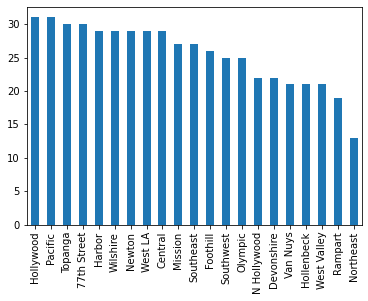

In [27]:
#Create Bar chart - Los Angeles Area call volume 



code_description['Los Angeles Area'].value_counts().plot(kind='bar')

# plt.xlabel('Los Angeles Area')
# plt.title('LAPD Calls for service')